In [16]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


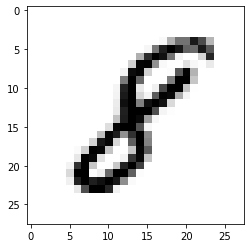

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2103 - accuracy: 0.9364
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0863 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0583 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0457 - accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0366 - accuracy: 0.9879


In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0488 - accuracy: 0.9857


[0.048836324363946915, 0.9857000112533569]

6


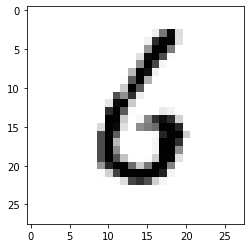

In [26]:
image_index = 50
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())